# Simulación de un Proceso de Salto dde Markov

### Código utilizado para simular el proceso de salto de Markov

1. Planteamos nuestro vector de inicio, con sus probabilidades correspondientes
2. Se establece nuestra matriz de transiciones
3. Definimos nuestros estados
4. Simulamos nuestro primer $x_0$, usando el vector inicial
5. Generamos el tiempo con distribución exponencial de permanencia del estado de $x_0$
6. Comenzamos el ciclo de acuerdo al número de simulaciones requeridas
7. Tomando en cuenta el estado anterior y su tiempo de permanencia, simulamos el sigiente estado, de acuerdo con sus probabilidades de la matriz
8. Se realizan las simulaciones solicitadas

In [38]:
#Función exponencial
import math
import numpy as np

def exp(n,l):
    lista = []
    for a in range(n):
        u = np.random.random() 
        x=-((1/l)*np.log(1-u))
        lista.append(x)
    return np.array(lista)

In [43]:
import numpy as np

def rmarkovchain(lam, pi, tiempo_maximo):  # Modificado para usar tiempo máximo en lugar de m fijo
    P = np.array([
        [0.1, 0.2, 0.15, 0.05, 0.1, 0.1, 0.3],
        [0.25, 0.1, 0.05, 0.1, 0.15, 0.2, 0.15],
        [0.2, 0.2, 0.1, 0.1, 0.1, 0.1, 0.2],
        [0.05, 0.1, 0.15, 0.25, 0.2, 0.1, 0.15],
        [0.3, 0.1, 0.05, 0.2, 0.1, 0.15, 0.1],
        [0.2, 0.1, 0.2, 0.15, 0.1, 0.05, 0.2],
        [0.1, 0.3, 0.2, 0.05, 0.1, 0.1, 0.15]
    ])
    states = [0, 1, 2, 3, 4, 5, 6]
    x = [np.random.choice(states, p=pi, size=1)[0]]
    lista = []
    acum = []
    t1 = 0
    while t1 < tiempo_maximo:
        t = 50*exp(10, lam).mean()  # Usa la función exp previamente definida
        lista.append(t)
        t1 += t  # Acumulamos los tiempos
        acum.append(t1)
        if t1 < tiempo_maximo:  # Solo cambia de estado si aún no ha alcanzado el tiempo máximo
            estado_actual = x[-1]
            next_estado = np.random.choice(states, p=P[estado_actual])
            x.append(next_estado)
        else:
            break  # Sal del bucle si el tiempo acumulado excede el tiempo máximo

    return np.array(x), np.array(lista), np.array(acum)


In [44]:
D = rmarkovchain(9,[0.15,0.2,0.1,0.05,0.25,0.1,0.15],150)
n = np.arange(0,100)
#plt.plot(n,D)
#plt.show()
print("Bodega a la que llega:", D[0])

print( "Tiempo en la bodega:", D[1])

print("Tiempo acumulado:",D[2])

Bodega a la que llega: [1 6 4 4 6 5 2 6 0 2 5 6 4 5 0 1 4 3 3 4 0 0 2 0 1 0 6 0]
Tiempo en la bodega: [6.40949166 3.3129663  4.79236216 4.10467363 3.46288608 3.97690907
 5.09949794 5.57495031 6.6096901  6.99304538 6.12725925 4.26709701
 3.55092226 4.9415859  9.04033681 4.69285608 6.83360881 3.97521161
 8.83397449 3.95197513 5.34709003 5.85329086 2.61802401 7.19480001
 6.83167044 6.03283253 9.53715072 4.29142066]
Tiempo acumulado: [  6.40949166   9.72245796  14.51482012  18.61949375  22.08237983
  26.0592889   31.15878684  36.73373715  43.34342725  50.33647264
  56.46373189  60.7308289   64.28175116  69.22333706  78.26367387
  82.95652996  89.79013877  93.76535038 102.59932487 106.5513
 111.89839003 117.75168089 120.3697049  127.56450491 134.39617535
 140.42900788 149.9661586  154.25757926]


### Explicación de los estados del sistema y la distribución de tiempos de permanencia 

Este código realiza la simulación de una matriz de transición de 7 x 7, la cual tiene 7 estados que se encuentran del 0 al 6.

El presente código se desarrolló considerando el flujo de llegada de 7 rutas de distribución y la entrega de productos a las 7 bodegas que utiliza una empresa de distribución y logística. De acuerdo con el incremento en la carga de trabajo, la empresa desea ampliar algunas bodegas o cerrar aquellas que no tienen un flujo considerable de llegada o permanencia. Sin embargo, para tomar la decisión sobre qué bodegas son adecuadas para ampliar o eliminar, necesitan conocer el tiempo de permanencia de una cierta cantidad de paquetes en las bodegas, así como las bodegas que, por temas logísticos, transfieren productos a otras y la ruta de llegada. Aunque en algunas bodegas la frecuencia de llegada es alta, la permanencia de los productos no lo es, lo que significa que la capacidad actual de esas bodegas es suficiente.

Por lo tanto, el objetivo es identificar cuáles de las 7 bodegas requieren una ampliación.

Cada una de las 7 bodegas tendrá su número correspondiente de identificación, que va del 0 al 6.

La matriz de transición es la siguiente:


$$
\mathbf{M} = \begin{bmatrix}
    0.1 & 0.2 & 0.15 & 0.05 & 0.1 & 0.1 & 0.3 \\
    0.25 & 0.1 & 0.05 & 0.1 & 0.15 & 0.2 & 0.15 \\
    0.2 & 0.2 & 0.1 & 0.1 & 0.1 & 0.1 & 0.2 \\
    0.05 & 0.1 & 0.15 & 0.25 & 0.2 & 0.1 & 0.15 \\
    0.3 & 0.1 & 0.05 & 0.2 & 0.1 & 0.15 & 0.1 \\
    0.2 & 0.1 & 0.2 & 0.15 & 0.1 & 0.05 & 0.2 \\
    0.1 & 0.3 & 0.2 & 0.05 & 0.1 & 0.1 & 0.15
\end{bmatrix}
$$

Las probabilidades de que un paquete llegue a las rutas 0, 1, 2, 3, 4, 5, 6 para luego ser entregado a una de las 7 bodegas son:
$$[0.15,0.2,0.1,0.05,0.25,0.1,0.15]$$

En este sentido, lo que representa la matriz es que un producto que llega a la ruta 0 tiene una probabilidad del 10% de llegar a la bodega 0; la probabilidad de que pase a la bodega 1 es del 20%, de llegar a la bodega 2 es del 15%, a la bodega 3 del 5%, a la bodega 4 del 10%, a la bodega 5 del 10% y a la bodega 6 del 30%.

Para la ruta 1, la probabilidad de que llegue a la bodega 0 es del 25%, a la bodega 1 del 10%, a la bodega 2 del 5%, a la bodega 3 del 10%, a la bodega 4 del 15%, a la bodega 5 del 20% y finalmente, a la bodega 6 del 15%.

En el caso de la ruta 2, el producto tiene una probabilidad del 20% de ser dirigido a la bodega 0, otro 20% de ir a la bodega 1, un 10% de llegar a la bodega 2, un 10% de pasar a la bodega 3, un 10% de llegar a la bodega 4, un 10% de terminar en la bodega 5 y un 20% de ir a la bodega 6.

En cuanto a la ruta 3, existe un 5% de probabilidad de que el producto se dirija a la bodega 0, un 10% de que llegue a la bodega 1, un 15% de que alcance la bodega 2, un 25% de probabilidad de que sea almacenado en la bodega 3, un 20% de que termine en la bodega 4, un 10% de que llegue a la bodega 5 y finalmente un 15% de probabilidad de que termine en la bodega 6.

Para la ruta 4, el producto tiene un 30% de probabilidad de ser enviado a la bodega 0, un 10% de que vaya a la bodega 1, un 5% de que llegue a la bodega 2, un 20% de probabilidad de que sea asignado a la bodega 3, un 10% de que sea almacenado en la bodega 4, un 15% de que vaya a la bodega 5 y un 10% de que termine en la bodega 6.

En lo que respecta a la ruta 5, existe una probabilidad del 20% de que el producto sea enviado a la bodega 0, un 10% de que se dirija a la bodega 1, un 20% de que llegue a la bodega 2, un 15% de que sea almacenado en la bodega 3, un 10% de que pase a la bodega 4, un 5% de que sea enviado a la bodega 5 y finalmente un 20% de que llegue a la bodega 6.

Finalmente, para la ruta 6, el producto tiene un 10% de probabilidad de llegar a la bodega 0, un 30% de que vaya a la bodega 1, un 20% de que alcance la bodega 2, un 5% de que sea dirigido a la bodega 3, un 10% de probabilidad de que pase a la bodega 4, un 10% de que se almacene en la bodega 5 y un 15% de que termine en la bodega 6.


la siguiente: 

### Gráfico de las Simulaciones

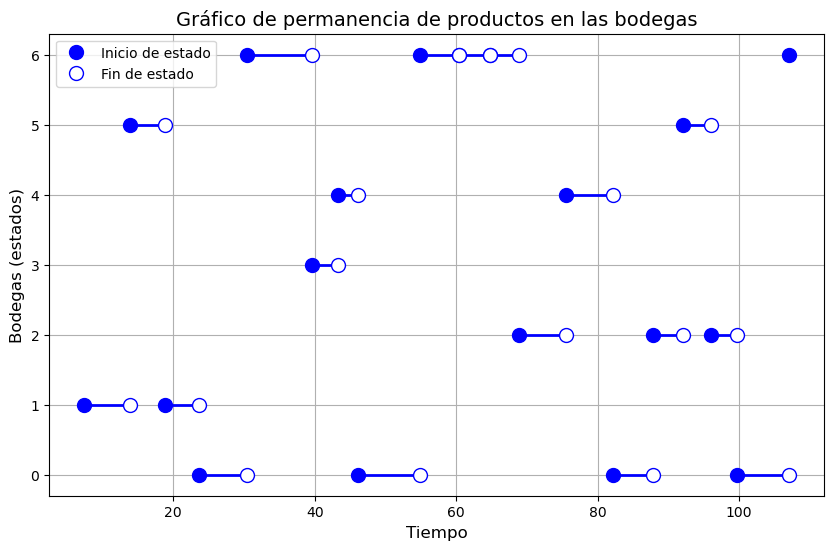

In [50]:
import numpy as np
import matplotlib.pyplot as plt

# Simulamos los datos (rmarkovchain ya está definido)
D = rmarkovchain(9, [0.15, 0.2, 0.1, 0.05, 0.25, 0.1, 0.15], 100)

# Crear la figura y la gráfica
plt.figure(figsize=(10, 6))

# Generar el gráfico de escalones sin líneas verticales
for i in range(len(D[0])-1):
    plt.hlines(D[0][i], D[2][i], D[2][i+1], color='blue', lw=2)  # Líneas horizontales sin saltos

# Agregar los puntos al inicio (rellenos) y al final (vacíos)
plt.plot(D[2], D[0], 'bo', markersize=10, label='Inicio de estado')  # Puntos rellenos al inicio
plt.plot(D[2][1:], D[0][:-1], 'bo', mfc='white', markersize=10, label='Fin de estado')  # Puntos vacíos al final

# Etiquetas y título
plt.xlabel('Tiempo', fontsize=12)
plt.ylabel('Bodegas (estados)', fontsize=12)
plt.title('Gráfico de permanencia de productos en las bodegas', fontsize=14)

# Mejorar cuadrícula y leyenda
plt.grid(True)
plt.legend()

# Mostrar el gráfico
plt.show()

En cada elemento el tiempo representa la permanencia que esta en ese esatdo antes de cambiar a otro estado, es simulado usando la distribución exponencial, que es comúnmente utilizada para modelar el tiempo entre eventos en procesos que son continuos y dependientes del tiempo, puede ser interpretado como la estabilidad o volatilidad del estado actual.el tiempo acumulado de los estados individuales es para dar una visión más global de la duración total del proceso hasta cada punto de transición